In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from cellpose import models
from cellpose import io

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(model_type='cyto')

2022-01-18 16:46:16,714 [INFO] WRITING LOG OUTPUT TO /camp/home/fallest/.cellpose/run.log
2022-01-18 16:46:16,988 [INFO] >>>> using CPU


In [2]:
timeseries_file = ['/camp/project/proj-lm-gutierrezm/Tracking_Tests/CellPose/Max_Gutierrez/MIPs/TimeSeries_Ch1.TIFF']

In [3]:
imstack=skio.imread(timeseries_file, plugin='tifffile')
imstack.shape

(75, 6048, 6048)

2022-01-18 16:46:25,866 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:47:42,356 [INFO] >>>> TOTAL TIME 76.49 sec


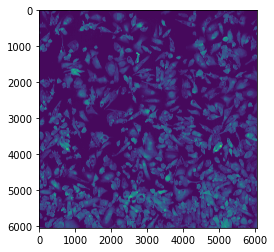

In [4]:
##see if I can cellpose the first slice
#change diams from None
channels = [[0,0]]
masks, flows, styles, diams = model.eval(imstack[0,:,:], diameter=130, channels=channels)
plt.imshow(imstack[0,:,:])

1


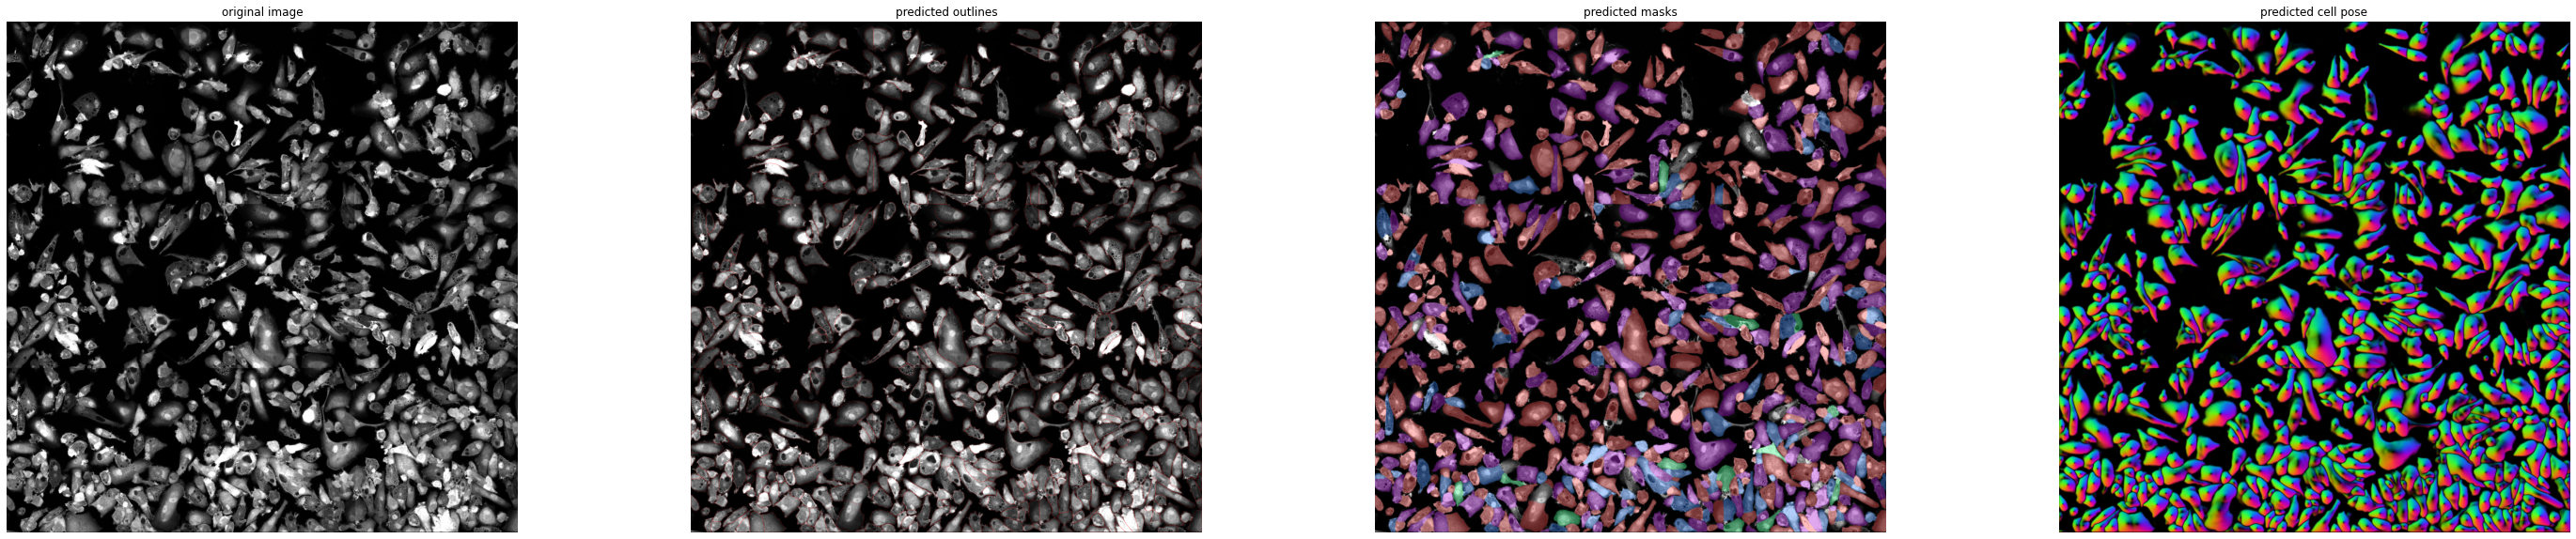

In [5]:
from cellpose import plot

nimg = 1
print(nimg)
for idx in range(nimg):
    maski = masks
    flowi = flows[0]

    fig = plt.figure(figsize=(50,10))
    plot.show_segmentation(fig, imstack[0,:,:], maski, flowi, channels=channels[idx])
    #plt.tight_layout()
    
    plt.show()

In [ ]:
%%time
#get the sizes of the stacks and run the cellpose, if we estimate the diameter

num_tps = imstack.shape[0]
x= imstack.shape[1]
y=imstack.shape[2]

masks = np.zeros(shape=(num_tps,y,x))
diams = np.zeros(shape=(1,1,num_tps))
flows = num_tps*[None]
styles = np.zeros(shape=(num_tps,256))

for idx in range(num_tps):
    print(idx)
    masks[idx], flows[idx], styles[idx], diams[0,0,idx] = model.eval(imstack[idx,:,:], diameter=130, channels=channels)
    save_file = 'masks_high_res.npy'
    np.save(save_file, masks)
    flows_np = np.array(flows)
    save_flows = 'flows_high_res.npy'
    np.save(save_flows, flows_np)

    diams_np = np.array(diams)
    save_diams = 'diams_high_res.npy'
    np.save(save_diams, diams_np)

    styles_np = np.array(styles)
    save_styles = 'styles_high_res.npy'
    np.save(save_styles, styles_np)

0
2022-01-18 16:48:40,396 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:49:54,832 [INFO] >>>> TOTAL TIME 74.44 sec
1
2022-01-18 16:50:01,241 [INFO] ~~~ FINDING MASKS ~~~


<timed exec>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2022-01-18 16:51:14,277 [INFO] >>>> TOTAL TIME 73.04 sec
2
2022-01-18 16:51:21,681 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:52:36,753 [INFO] >>>> TOTAL TIME 75.07 sec
3
2022-01-18 16:52:41,907 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:53:56,764 [INFO] >>>> TOTAL TIME 74.86 sec
4
2022-01-18 16:54:02,054 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:55:12,575 [INFO] >>>> TOTAL TIME 70.52 sec
5
2022-01-18 16:55:17,847 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:56:31,547 [INFO] >>>> TOTAL TIME 73.70 sec
6
2022-01-18 16:56:36,731 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:57:50,498 [INFO] >>>> TOTAL TIME 73.77 sec
7
2022-01-18 16:57:55,893 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 16:59:06,927 [INFO] >>>> TOTAL TIME 71.03 sec
8
2022-01-18 16:59:12,629 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 17:00:25,622 [INFO] >>>> TOTAL TIME 72.99 sec
9
2022-01-18 17:00:31,132 [INFO] ~~~ FINDING MASKS ~~~
2022-01-18 17:01:43,324 [INFO] >>>> TOTAL TIME 72.19 sec
10
2022-01-18 17:01:49,864 [INFO] ~~~ FINDING M

In [ ]:
#get the sizes of the stacks and run the cellpose
%%time
num_tps = imstack.shape[0]
x= imstack.shape[1]
y=imstack.shape[2]

masks = np.zeros(shape=(num_tps,y,x))
diams = np.zeros(shape=(1,1,num_tps))
flows = num_tps*[None]
styles = np.zeros(shape=(num_tps,256))

for idx in range(num_tps):
    print(idx)
    masks[idx], flows[idx], styles[idx], diams[0,0,idx] = model.eval(imstack[idx,:,:], diameter=None, channels=channels)

In [ ]:
save_file = 'masks_high_res.npy'
np.save(save_file, masks)

flows_np = np.array(flows)
save_flows = 'flows_high_res.npy'
np.save(save_flows, flows_np)

diams_np = np.array(diams)
save_diams = 'diams_high_res.npy'
np.save(save_diams, diams_np)

styles_np = np.array(styles)
save_styles = 'styles_high_res.npy'
np.save(save_styles, styles_np)

In [1]:
masks.shape

NameError: name 'masks' is not defined